Make a big pandas dataframe to hold all the metric values we're interested in, so then we can pass it around and plot it up any way we like

I guess depth in each filter for each DDF?



In [1]:
import glob
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pylab as plt
import os
%matplotlib inline

In [2]:
# I just coppied them over from hyak and sym linked them to this directory for ease of use
glance_dirs = glob.glob('./*_glance')

glance_dirs.sort()


In [3]:
glance_dirs

['./baseline_nexp1_v1.6.1_10yrs_glance',
 './baseline_nexp2_v1.6.1_10yrs_glance',
 './cadence_drive_gl100_gcbv1.6.1_10yrs_glance',
 './cadence_drive_gl100v1.6.1_10yrs_glance',
 './cadence_drive_gl200_gcbv1.6.1_10yrs_glance',
 './cadence_drive_gl200v1.6.1_10yrs_glance',
 './cadence_drive_gl30_gcbv1.6.1_10yrs_glance',
 './cadence_drive_gl30v1.6.1_10yrs_glance',
 './footprint_var_0_v1.6.1_10yrs_glance',
 './footprint_var_10_v1.6.1_10yrs_glance',
 './footprint_var_11_v1.6.1_10yrs_glance',
 './footprint_var_1_v1.6.1_10yrs_glance',
 './footprint_var_2_v1.6.1_10yrs_glance',
 './footprint_var_3_v1.6.1_10yrs_glance',
 './footprint_var_4_v1.6.1_10yrs_glance',
 './footprint_var_5_v1.6.1_10yrs_glance',
 './footprint_var_6_v1.6.1_10yrs_glance',
 './footprint_var_7_v1.6.1_10yrs_glance',
 './footprint_var_8_v1.6.1_10yrs_glance',
 './footprint_var_9_v1.6.1_10yrs_glance',
 './pair_times_11_v1.6.1_10yrs_glance',
 './pair_times_22_v1.6.1_10yrs_glance',
 './pair_times_33_v1.6.1_10yrs_glance',
 './pair_tim

In [4]:
filenames = [name.replace('./', '').replace('_glance', '') for name in glance_dirs]

In [5]:
runNames =  [name[2:].replace('_v1.6.1_10yrs_glance','').replace('v1.6.1_10yrs_glance','').replace('v1.6_10yrs_glance','') for name in glance_dirs] 
versions = ['1.6.1']*len(glance_dirs) 

In [6]:
runNames

['baseline_nexp1',
 'baseline_nexp2',
 'cadence_drive_gl100_gcb',
 'cadence_drive_gl100',
 'cadence_drive_gl200_gcb',
 'cadence_drive_gl200',
 'cadence_drive_gl30_gcb',
 'cadence_drive_gl30',
 'footprint_var_0',
 'footprint_var_10',
 'footprint_var_11',
 'footprint_var_1',
 'footprint_var_2',
 'footprint_var_3',
 'footprint_var_4',
 'footprint_var_5',
 'footprint_var_6',
 'footprint_var_7',
 'footprint_var_8',
 'footprint_var_9',
 'pair_times_11',
 'pair_times_22',
 'pair_times_33',
 'pair_times_44',
 'pair_times_55',
 'twi_pairs_mixed_repeat',
 'twi_pairs_mixed',
 'twi_pairs_repeat',
 'twi_pairs',
 'u_long_50_nexp1',
 'u_long_50_nexp2',
 'u_long_60_nexp1',
 'u_long_60_nexp2',
 'u_long_ms_30',
 'u_long_ms_40',
 'u_long_ms_50',
 'u_long_ms_60']

In [7]:
# Set up the dataframe
df = pd.DataFrame(np.array([runNames, versions]).T, columns=['runName', 'version'])

In [8]:
# List of tupes with (metricName, summaryName) that we want to pull from glance dirs
mnamesname =[('parallax', 'best18k'),
            ('properMotion', 'best18k'),
            ('fO', 'fONv MedianNvis'),
            ('fO', 'fOArea')]

In [9]:
for names in mnamesname:
    column_vals = []
    sql = 'select summaryValue from summarystats where metricId = (select metricId from metrics where metricName = "%s") and summaryName= "%s";' % (names[0], names[1])
    for directory in glance_dirs:
        conn = sqlite3.connect(directory+'/resultsDb_sqlite.db')
        result = pd.read_sql(sql, conn).values.ravel()
        if np.size(result) > 1:
            ValueError
        else:
            column_vals.append(np.max(result))
        conn.close()
    df[names[0]+'_'+names[1]] = column_vals

In [10]:
# Add the median coadded depths in each filter
for filtername in 'ugrizy':
    column_vals = []
    sql = 'select summaryValue from summarystats where metricId = (select metricId from metrics where metricName = "CoaddM5" and metricMetadata=" %s") and summaryName= "Median";' % (filtername)
    for directory in glance_dirs:
        conn = sqlite3.connect(directory+'/resultsDb_sqlite.db')
        result = pd.read_sql(sql, conn).values.ravel()
        if np.size(result) > 1:
            ValueError
        else:
            column_vals.append(np.max(result))
        conn.close()
    df['median_coadd_%s' % filtername] = column_vals


In [11]:
# Add the median count in each filter
for filtername in 'ugrizy':
    column_vals = []
    sql = 'select summaryValue from summarystats where metricId = (select metricId from metrics where metricName = "Count observationStartMJD" and metricMetadata=" %s") and summaryName= "Median";' % (filtername)
    for directory in glance_dirs:
        conn = sqlite3.connect(directory+'/resultsDb_sqlite.db')
        result = pd.read_sql(sql, conn).values.ravel()
        if np.size(result) > 1:
            ValueError
        else:
            column_vals.append(np.max(result))
        conn.close()
    df['median_Nvis_%s' % filtername] = column_vals


In [12]:
df['median_Nvis_%s' % filtername]

0     194.0
1     180.0
2     191.0
3     191.0
4     186.0
5     183.0
6     193.0
7     192.0
8     178.0
9     170.0
10    181.0
11    179.0
12    177.0
13    178.0
14    179.0
15    176.0
16    179.0
17    176.0
18    182.0
19    170.0
20    186.0
21    195.0
22    197.0
23    198.0
24    199.0
25    195.0
26    195.0
27    196.0
28    196.0
29    191.0
30    177.0
31    188.0
32    174.0
33    183.0
34    179.0
35    178.0
36    175.0
Name: median_Nvis_y, dtype: float64

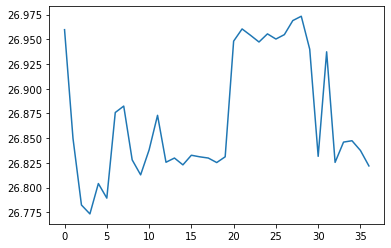

In [13]:
plt.plot(df['median_coadd_g'])

In [14]:
df.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'median_Nvis_u', 'median_Nvis_g', 'median_Nvis_r', 'median_Nvis_i',
       'median_Nvis_z', 'median_Nvis_y'],
      dtype='object')

In [15]:
# pickle would be much smaller, but I guess can zip after if we want to
df.to_hdf('depths_maf_dataframe.hdf', 'maf')
# restore with:
# df = pd.read_hdf('combined_maf_dataframe.hdf', 'maf')